In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data with Column V as Efficiency
df = pd.read_csv(
    '/Users/abiaimam/Downloads/nba_efficiency.csv',
    low_memory=False
)

# 2. Check Column Names (debugging)
print("All Columns:", df.columns.tolist())


All Columns: ['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'FG', 'FGA', '3P', '2P', 'eFG%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '#VALUE!']


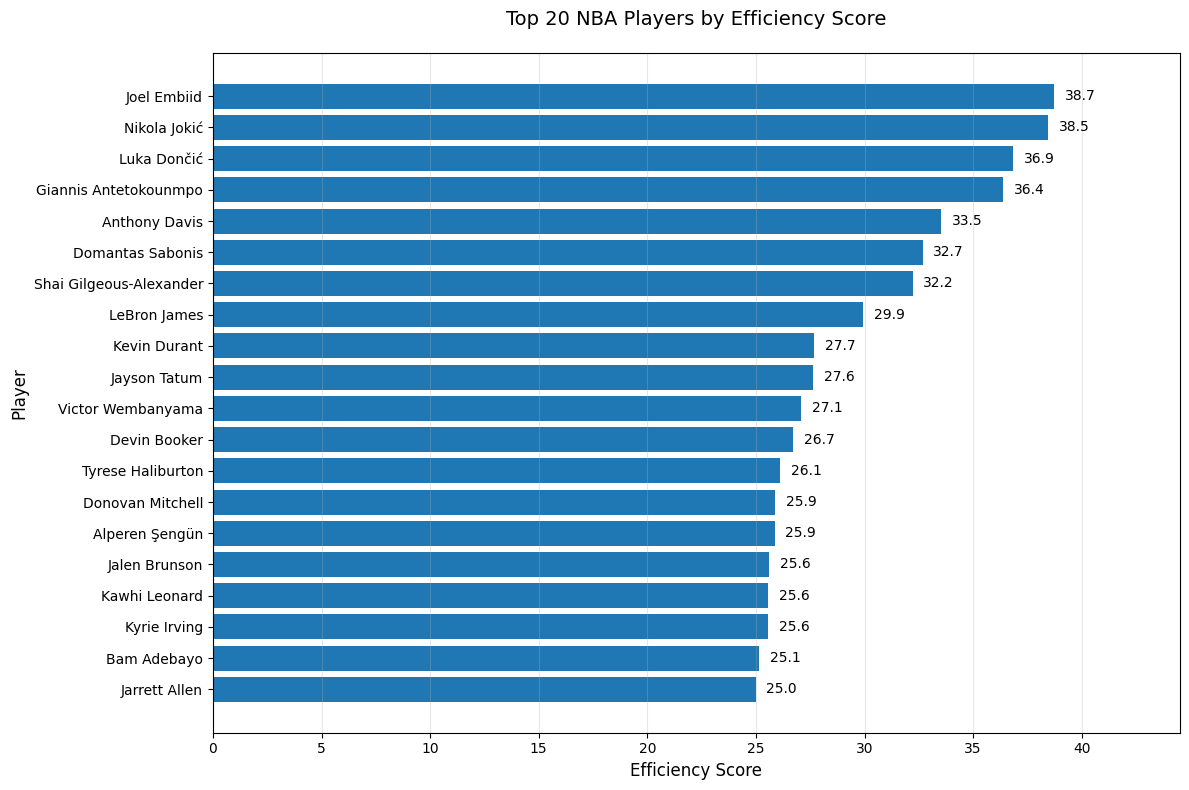

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set a clean font (avoid character errors)
plt.rcParams['font.family'] = 'DejaVu Sans'

# 1. Load and clean data
df = pd.read_csv('/Users/abiaimam/Downloads/nba_efficiency.csv', low_memory=False)
df.columns = df.columns.str.strip()
df['Efficiency'] = pd.to_numeric(df['#VALUE!'], errors='coerce')

# 2. Get top 20 players by efficiency
top_players = df.dropna(subset=['Efficiency']).nlargest(20, 'Efficiency')

# 3. Create clean horizontal bar chart
plt.figure(figsize=(12, 8))

# Plot bars
bars = plt.barh(
    top_players['Player'][::-1],  # Reverse order (highest at top)
    top_players['Efficiency'][::-1],
    color='#1f77b4',  # Professional blue
    height=0.8
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,  # Position right of bar
        bar.get_y() + bar.get_height()/2,
        f'{width:.1f}',  # One decimal place
        va='center',
        ha='left',
        fontsize=10
    )

# Formatting
plt.title('Top 20 NBA Players by Efficiency Score', pad=20, fontsize=14)
plt.xlabel('Efficiency Score', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.xlim(0, top_players['Efficiency'].max() * 1.15)  # Add 15% padding
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
#bar graph shows Pure ranking of players by one metric (efficiency), Who has the highest/lowest efficiency
#"Nikola Jokić (35.2) is 15% more efficient than Giannis (30.5)"
#clear ranking
#weakness: hides other stats
Exact numerical differences between players
plt.show()

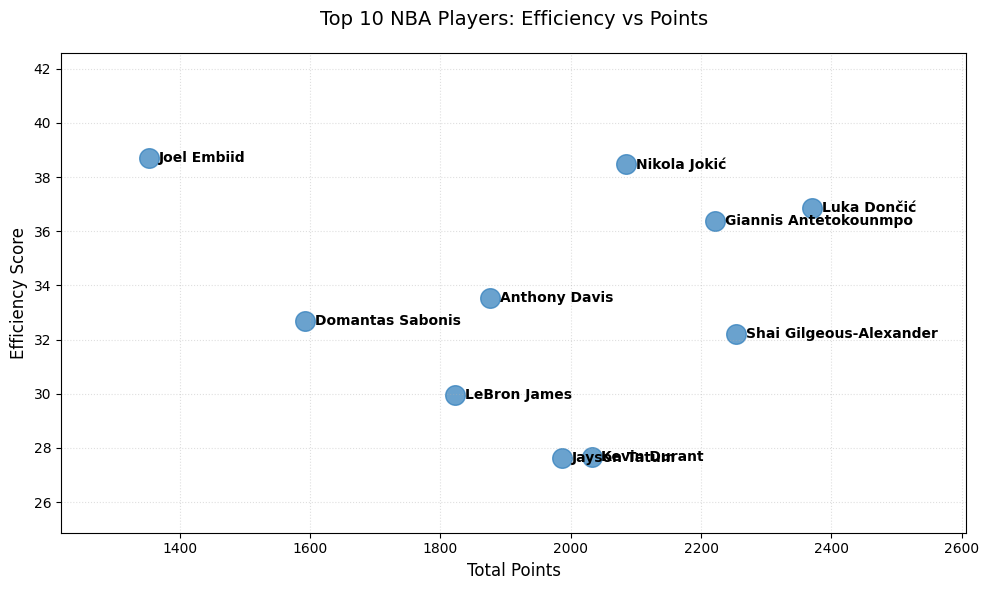

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load and clean data
df = pd.read_csv('/Users/abiaimam/Downloads/nba_efficiency.csv', low_memory=False)
df['Efficiency'] = pd.to_numeric(df['#VALUE!'], errors='coerce') 
top_10 = df.nlargest(10, 'Efficiency')  # ← Only top 10 now

# 2. Create minimalist scatterplot
plt.figure(figsize=(10, 6))

# Plot each player with name label
for _, player in top_10.iterrows():
    plt.scatter(
        player['PTS'],
        player['Efficiency'],
        s=200,  # Larger dots
        color='#2b7bba',  # Professional blue
        alpha=0.7
    )
    plt.text(
        player['PTS'] + 15,  # X-offset
        player['Efficiency'],  # Same Y-position
        player['Player'],
        fontsize=10,
        va='center',
        fontweight='bold'
    )

# 3. Clean formatting
plt.title("Top 10 NBA Players: Efficiency vs Points", fontsize=14, pad=20)
plt.xlabel("Total Points", fontsize=12)
plt.ylabel("Efficiency Score", fontsize=12)
plt.grid(axis='both', linestyle=':', alpha=0.4)

# Set axis limits with 10% padding
plt.xlim(top_10['PTS'].min()*0.9, top_10['PTS'].max()*1.1)
plt.ylim(top_10['Efficiency'].min()*0.9, top_10['Efficiency'].max()*1.1)
#scatterplot Reveals relationships between two metrics, If high-scoring players tend to be more efficient (pattern), outliers, best for answering do players who score more tend to be more efficient.
#reveals correlation, but it can get crowded
plt.tight_layout()
plt.show()

Columns: ['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'FG', 'FGA', '3P', '2P', 'eFG%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '#VALUE!', 'Efficiency']
Correlation between Efficiency and Points: 0.87


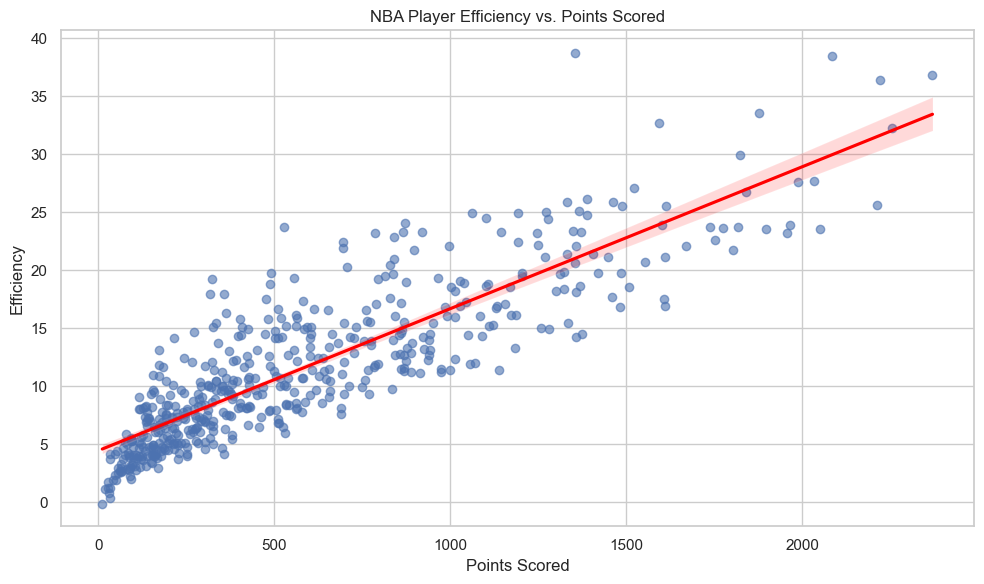

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV
df = pd.read_csv('/Users/abiaimam/Downloads/nba_efficiency.csv', low_memory=False)

# 2. Convert the column with bad header ('#VALUE!') to numeric and rename
df['Efficiency'] = pd.to_numeric(df['#VALUE!'], errors='coerce')

# 3. OPTIONAL: Check column names if you're unsure
print("Columns:", df.columns.tolist())

# 4. Drop rows where Efficiency or PTS is missing
df_clean = df[['Efficiency', 'PTS']].dropna()

# 5. Correlation calculation
correlation = df_clean['Efficiency'].corr(df_clean['PTS'])
print(f"Correlation between Efficiency and Points: {correlation:.2f}")

# 6. Visualization - Scatter plot with regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='PTS', y='Efficiency', scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
plt.title('NBA Player Efficiency vs. Points Scored')
plt.xlabel('Points Scored')
plt.ylabel('Efficiency')
plt.tight_layout()
plt.show()
